# Data Science Workshop


### Welcome to Data Science 101

In today's workshop we are going to talk about data mining aspect of  Data Science.

<b> Data mining is the science of discovering structure and making predictions in large or complex data sets"

Some of the use cases of " Data mining" in day to day life are spam filtering, outbreak detection, fraud detection etc

- How can we tell apart spam from real emails?
- How do we identify fraudulent transactions?
- Is the president’s tweet going viral? Is the flu going viral?

![intro.jpg](img/intro.jpg)


### Prerequisites for this workshop

- Python - Beginner level introduction to the language to follow along the code
- Statistics 101 - Introduction to basic statistics like centeral tendency, variability and sampling of data

### Goals and scope for this workshop

- Thinking about data mining problems
- Become familiar with common terminology
- Solve a real life data set using machine learning algorithm ( Linear Regression )
- Learn to compare the performance of different methods and to validate models


### Centeral theme of this workshop

- Predictive analytics - Given past data, could we predict future values
- Model interpreation - How can you explain your model to an audience?
- Generalizability - Capture only useful trends to generalize well to unseen data. We don't want to do meaningless extrapolation

<img src="img/joke.jpg">



### Terminology Alert !

- <b> Input features or independent variables </b> - Input data or data quality we utilize to predict an outcome
- <b> Target variable </b> - Output values we are tring to predict
- <b> Training data </b> - Data utilized to train the model
- <b> Validation or test data </b> - Data reserved to observe the model performance
- <b> Cross validation </b> -  Sampling technique utilized to evaluate model performance


## Import libraries

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import KFold,cross_val_score
from IPython.display import Image
from IPython.core.display import HTML 
import warnings
warnings.filterwarnings("ignore")

## Boston housing dataset

## Load datasets

In [207]:
#Load datasts into  variables
boston = load_boston()

In [208]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [209]:
X = pd.DataFrame(boston.data)
y = boston.target

In [210]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [211]:
#Assign column names to the data
X.columns = boston.feature_names

## Feature Observations

In [212]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [213]:
data = X.copy()
data['MEDV'] = y

In [214]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [215]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 720x576 with 0 Axes>

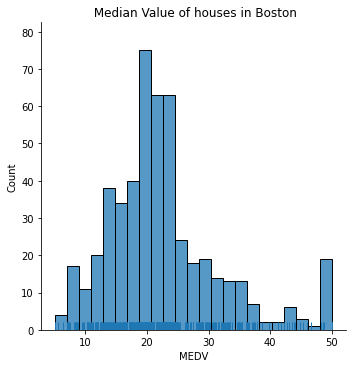

In [216]:
#Check distribution of the target variable
plt.figure(figsize=(10, 8))
sns.displot(data['MEDV'], rug=True)
plt.title(" Median Value of houses in Boston")
plt.show()

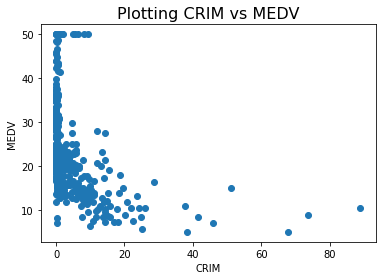

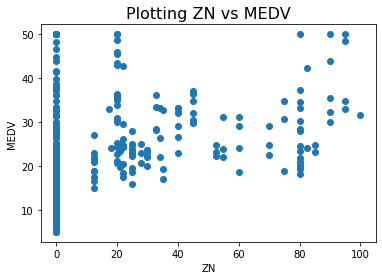

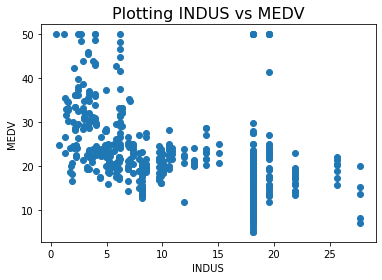

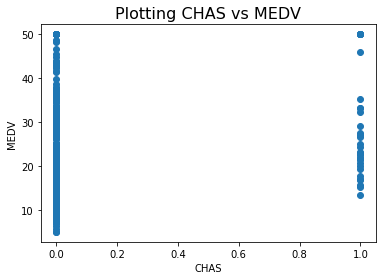

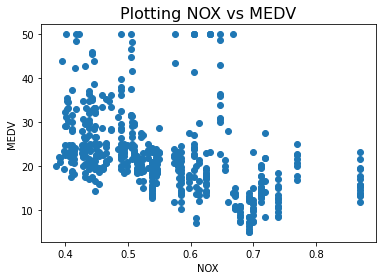

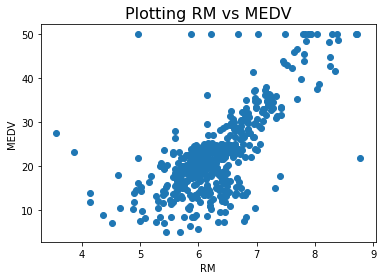

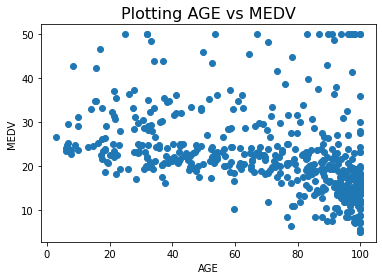

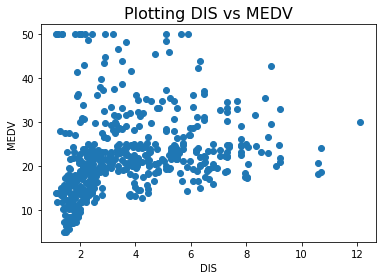

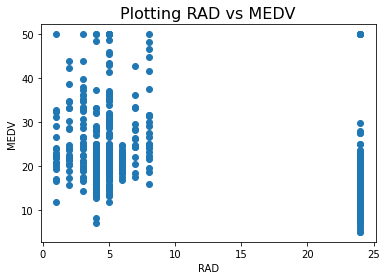

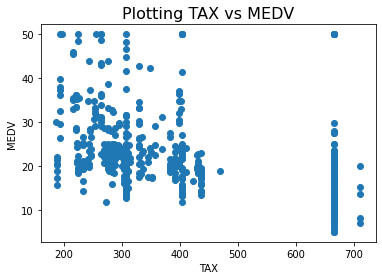

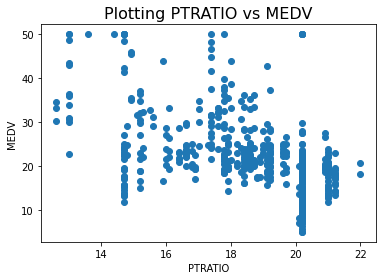

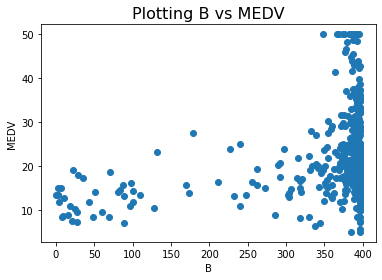

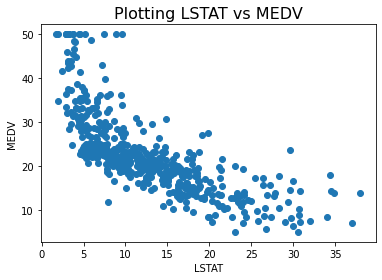

In [217]:
#Plot every input feature against the target variable
#Also can use pairplots
#sns.pairplot(data)
for col in X.columns:
    plt.scatter(X[col],y)
    plt.title("Plotting "+ str(col)+ " vs MEDV", size = 16)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

In [218]:
#Check correlation coefficients
#Also can use data.corr()
for col in X.columns:
    corr = np.corrcoef(X[col],y)
    print("Correlation coeff "+ col + " vs MEDV: " + str(corr[0][1]))

Correlation coeff CRIM vs MEDV: -0.3883046085868113
Correlation coeff ZN vs MEDV: 0.36044534245054277
Correlation coeff INDUS vs MEDV: -0.4837251600283727
Correlation coeff CHAS vs MEDV: 0.17526017719029854
Correlation coeff NOX vs MEDV: -0.42732077237328264
Correlation coeff RM vs MEDV: 0.6953599470715395
Correlation coeff AGE vs MEDV: -0.3769545650045963
Correlation coeff DIS vs MEDV: 0.24992873408590388
Correlation coeff RAD vs MEDV: -0.38162623063977763
Correlation coeff TAX vs MEDV: -0.468535933567767
Correlation coeff PTRATIO vs MEDV: -0.5077866855375617
Correlation coeff B vs MEDV: 0.33346081965706653
Correlation coeff LSTAT vs MEDV: -0.7376627261740147


By looking at the pair plots and correlation coefficients, we can see features like RM, LSTAT, PTRATIO has somewhat significant relationships with the target value "Median value of the house"

## Introduction to linear regression

We can look at the above problem in the following way:

- X = (X1,X2,X3) where X1, X2, X3 represents feature values
- Now, we can write our model as Y = f(X) + ϵ where ϵ captures measurement errors and other discrepancies between the response Y and the model f
- With a good model f, we can:
    - Make predictions of Y at new points X = x.
    - Understand which components of X = (X1,X2, . . . ,Xp) are important for predicting Y .
    
- <b> Linear regression </b> is a supervised learning approach that models the dependence of Y on the covariates X1,X2, . . . ,Xp as being linear:

<img src="img/lr_eq.jpg">

- Given estimates beta for the model coefficients, we can predict the response at a value x = (x1, . . . , xp) via below:

<img src = "img/est_lr_eq.jpg">

- The hat symbol denotes values estimated from the data

- Suppose that we have data (xi, yi), i = 1, . . . , n

<img src = "img/matrix.jpg">

- Linear regression estimates the parameters Beta j by finding the parameter values that minimize the residual sum of squares (RSS):


<img src = "img/cost_fun.jpg">

- The quantity ei = yi − ˆyi is called a residual

<img src = "img/ls_dis.jpg">

- The parameter estimates ˆBeta0, ˆBeta1, . . . , ˆBeta p are obtained by minimizing the residual sum of squares

<img src = "img/res_eq.jpg">


<i> image ref: https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model.html#m-081094134620849288292573 </i>

### Assumptions of Linear regression
- <b>Linear relationship</b>: There exists a linear relationship between the independent variable, x, and the dependent variable, y.
- <b>Independence</b>: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.
- <b>Homoscedasticity </b>: The residuals have constant variance at every level of x.
- <b>Normality</b>: The residuals of the model are normally distributed.

### Model Building

In [219]:
# We will first split our data into training and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [220]:
#Model fitting

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [221]:
# Predict on test data
predictions = lm.predict(X_test)

### Model evaluation

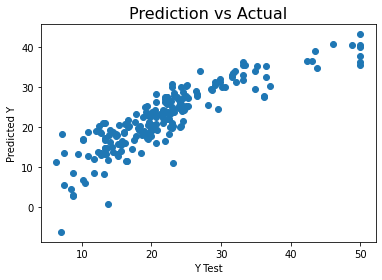

In [222]:
#Compare test values vs Actual values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title("Prediction vs Actual", size = 16)
plt.show()

### Cross validation

- The most widely used approach for estimating Test Error
- Error estimates can be used to select the best model, and also reflect the test error of the final chosen model
- Main idea: K-fold Cross-validation
    1. Randomly split the data into K equal-sized parts (“folds”)
    2. Give each part the chance to be the Validation set, treating the other K − 1 parts (combined) as the Training set
    3. Average the test error over all of the folds
    4. Pick the simplest model among those with the lowest CV-error
    5. Final model: Refit model on the entire data set.
- Most common choices of K: 5, 10, n
- The case K = n is also known as Leave-one-out Cross-validation

<img src = "img/cv.jpg">

In [223]:
# K fold Cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=folds)
scores

array([-30.99899883, -26.44757814, -26.79321228, -27.92378239,
       -25.53552389])

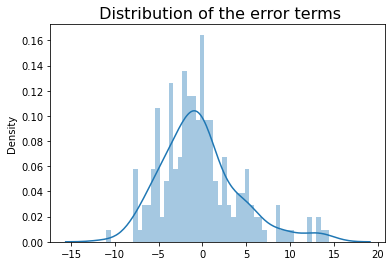

In [224]:
sns.distplot((y_test-predictions),bins=50)
plt.title(" Distribution of the error terms", size = 16)
plt.show()

## References

- An Introduction to Statistical Learning, with applications in R (Springer, 2013)
- 95-791 Lecture notes (Prof. Dubrawski) ( Carnegie Mellon University )